In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

# Reading and extracting the data from local directory
data = pd.read_csv('amz_uk_price_prediction_dataset.csv')

Part 1: Analyzing Best-Seller Trends Across Product Categories

Objective: Understand the relationship between product categories and their best-seller status.

In [2]:
# Generating a crosstab for 'category' and 'isBestSeller'
crosstab_result = pd.crosstab(data['category'], data['isBestSeller'])

# Calculate the proportion of bestsellers for each category
crosstab_result['proportion_bestSeller'] = crosstab_result.get(0, 1) / crosstab_result.sum(axis=1)

# Sort the categories based on the proportion of bestsellers in descending order
sorted_crosstab_result = crosstab_result.sort_values(by='proportion_bestSeller', ascending=False)

# Display the sorted result
sorted_crosstab_result

isBestSeller,False,True,proportion_bestSeller
category,,,
Smart Speakers,53,1,0.018519
Smart Home Security & Lighting,98,6,0.009615
Alexa Built-In Devices,106,1,0.009346
Motorbike Chassis,107,0,0.009346
Plugs,106,1,0.009346
...,...,...,...
Birthday Gifts,18943,35,0.000053
Bath & Body,19059,33,0.000052
"Handmade Clothing, Shoes & Accessories",19215,14,0.000052


In [3]:
from scipy.stats import chi2_contingency

# Chi-square test for 'category' and 'isBestSeller'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(36625.025632188976, 0.0)

In [4]:
chi2, p, dof, ex = chi2_contingency(crosstab_result.iloc[:, :-1])
print(f"Chi-square test statistic: {chi2}, p-value: {p}")

n = crosstab_result.values.sum()
cramers_v = np.sqrt(chi2 / (n * (min(crosstab_result.shape) - 1)))
print(f"Cramér's V: {cramers_v}")

Chi-square test statistic: 36540.20270061387, p-value: 0.0
Cramér's V: 0.08646709065827313


<Axes: xlabel='category'>

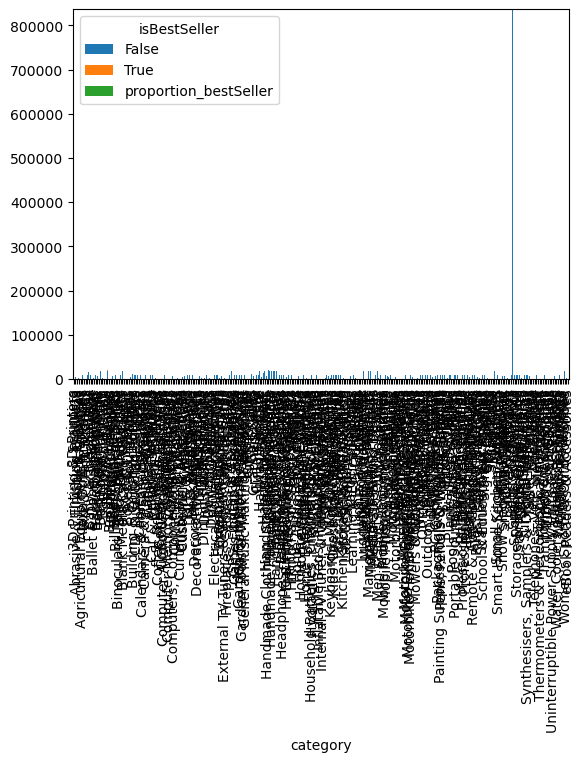

In [5]:
# Plotting a stacked bar chart for the 'crosstab_result' data
crosstab_result.plot(kind="bar", stacked=True)

Part 2: Exploring Product Prices and Ratings Across Categories and Brands

Objective: Investigate how different product categories influence product prices.

In [6]:
# Calculate IQR for product prices
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
data_no_outliers = data[(data['price'] >= Q1 - 1.5 * IQR) & (data['price'] <= Q3 + 1.5 * IQR)]# Calculate IQR for product prices
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
data_no_outliers = data[(data['price'] >= Q1 - 1.5 * IQR) & (data['price'] <= Q3 + 1.5 * IQR)]

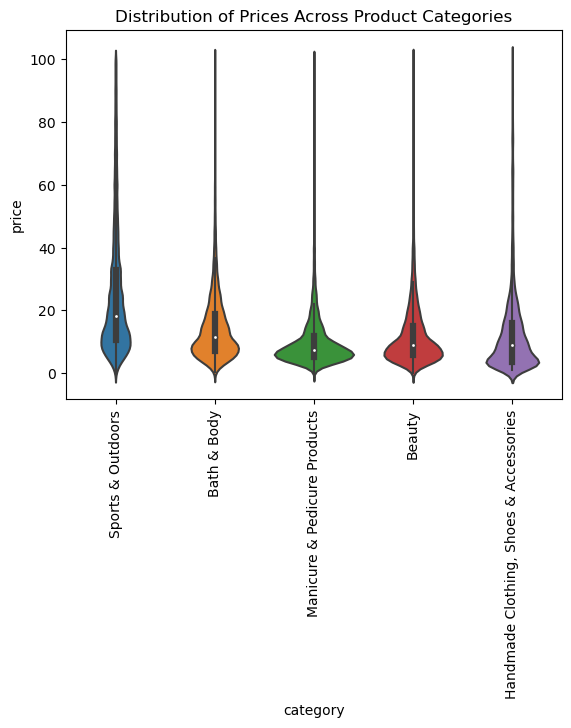

In [7]:
# Filter out the top 20 categories based on count for better visualization
top_categories = data_no_outliers['category'].value_counts().nlargest(5).index
sns.violinplot(x='category', y='price', data=data_no_outliers[data_no_outliers['category'].isin(top_categories)])
plt.xticks(rotation=90)
plt.title('Distribution of Prices Across Product Categories')
plt.show()

In [8]:
median_prices = data_no_outliers.groupby('category')['price'].median().sort_values(ascending=False)
print(f"The category with the highest median price is: {median_prices.idxmax()}")

The category with the highest median price is: Desktop PCs


<Axes: xlabel='category', ylabel='price'>

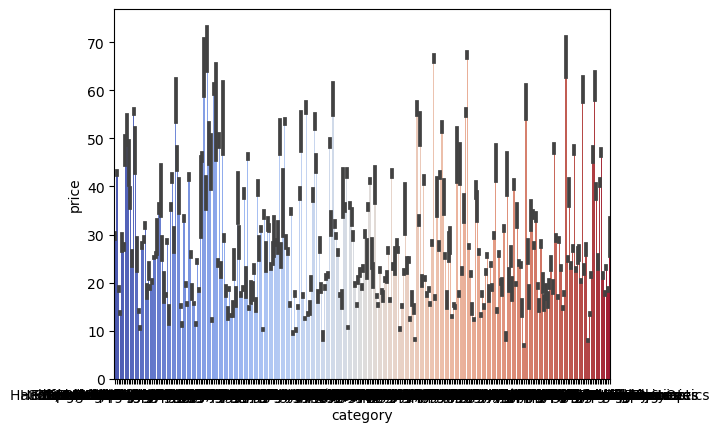

In [9]:
# Plotting a bar plot to visualize the average price for each category
sns.barplot(data=data_no_outliers, x='category', y='price', palette="coolwarm")

# I don't know how to retieve only the top 10. But I know another method to visualize it.

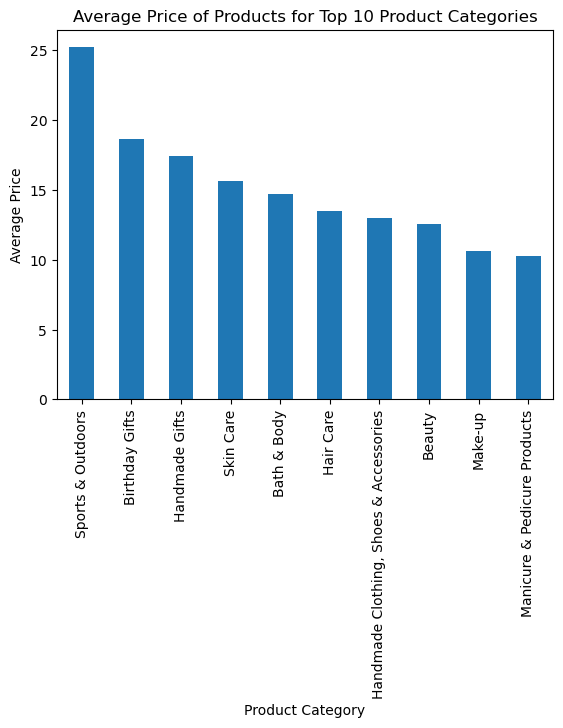

In [10]:
top_10_categories = data_no_outliers['category'].value_counts().nlargest(10).index
average_prices = data_no_outliers[data_no_outliers['category'].isin(top_10_categories)].groupby('category')['price'].mean().sort_values(ascending=False)
average_prices.plot(kind='bar')
plt.title('Average Price of Products for Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.show()

In [11]:
print(f"The category with the highest average price is: {average_prices.idxmax()}")


The category with the highest average price is: Sports & Outdoors


<Axes: xlabel='category', ylabel='stars'>

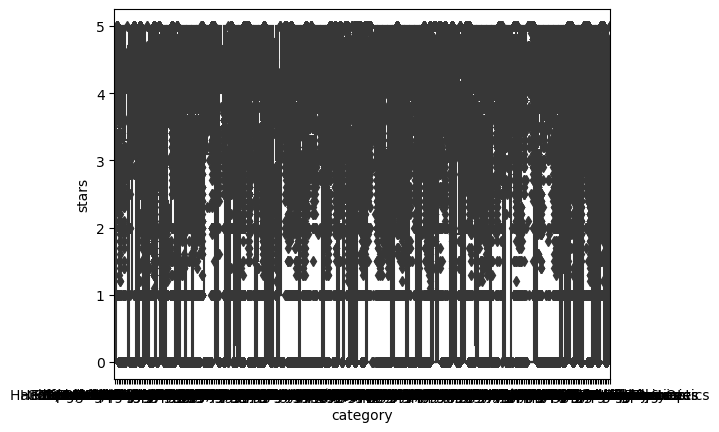

In [16]:
# Plotting a box plot to visualize the spread and outliers of 'price' for each category
sns.boxplot(data=data_no_outliers, x='category', y='stars', palette="coolwarm")

# Same with this one, I don't know how to retrieve the top 10, however, this is an alternative.

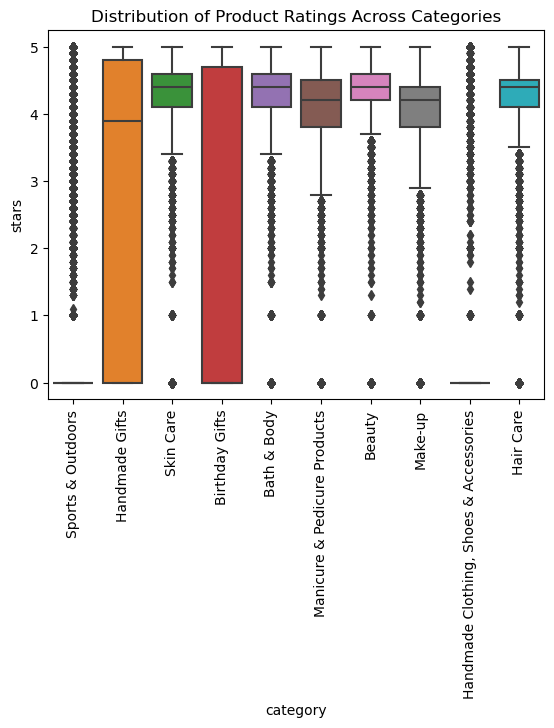

In [15]:
sns.boxplot(x='category', y='stars', data=data_no_outliers[data_no_outliers['category'].isin(top_10_categories)])
plt.xticks(rotation=90)
plt.title('Distribution of Product Ratings Across Categories')
plt.show()

In [18]:
median_ratings = data_no_outliers.groupby('category')['stars'].median().sort_values(ascending=False)
print(f"The category with the highest median rating is: {median_ratings.idxmax()}")

The category with the highest median rating is: Computer Memory


Part 3: Investigating the Interplay Between Product Prices and Ratings

Objective: Analyze how product ratings (stars) correlate with product prices.

In [19]:
# Calculating the Pearson correlation coefficient between price and ratings
correlation = data_no_outliers['price'].corr(data_no_outliers['stars'])
correlation

# Price and rating have a negative relationship but a very weak relationship due to it's approximation to 0 

-0.0776729987818137

<Axes: xlabel='price', ylabel='stars'>

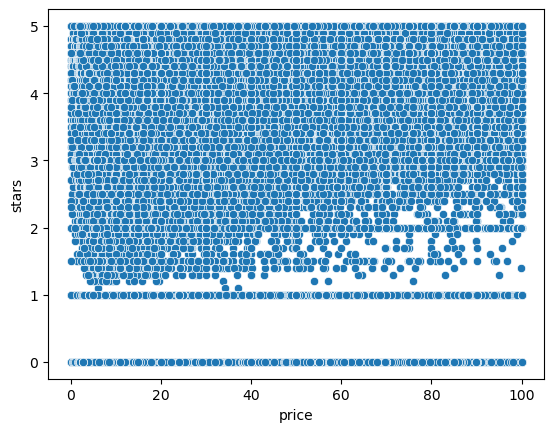

In [20]:
# Plotting a scatter plot to visualize the relationship between price and rating
sns.scatterplot(data=data_no_outliers, x='price', y='stars')

In [21]:
# There is a lot of data between the 2 and 5 rating stars. A a huge cluster in the 0 stars.For some reason, no one gave a rating between 0 and 1. 

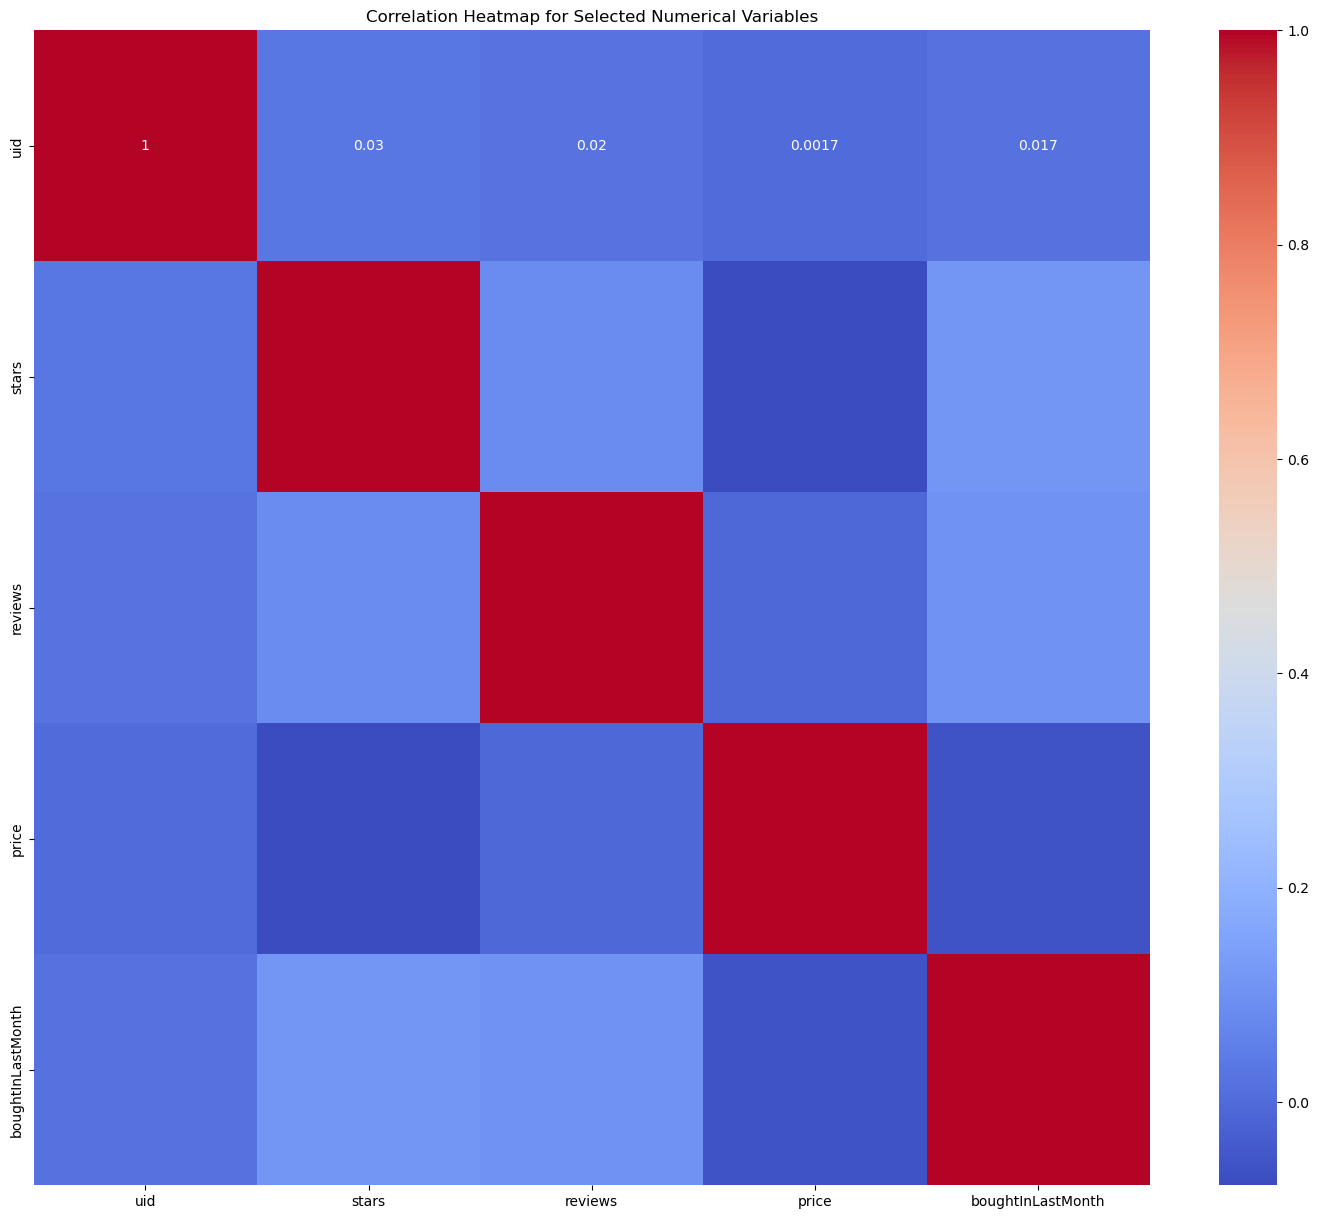

In [23]:
# Making a dataset of just numerical values.
numerical_data = data_no_outliers.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_data.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

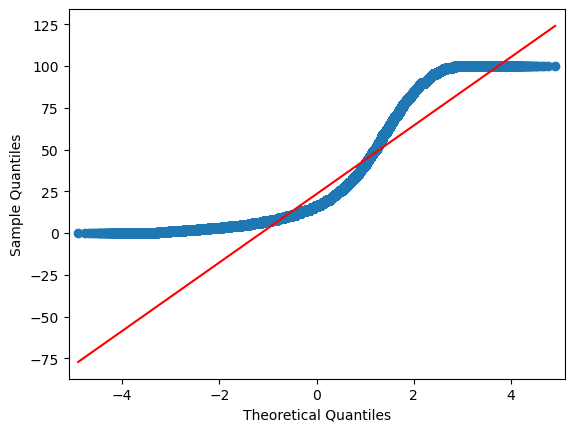

In [24]:
import statsmodels.api as sm

# Generating a Q-Q plot for 'price' to check if its distribution follows a normal distribution
sm.qqplot(data_no_outliers['price'], line='s');

Business-centric Report:

Key takeaways:
- Best-Seller Trends: Certain categories have a higher propensity for products to become best-sellers, though the influence of category on best-seller status is weak.
- Pricing Insights: Variations in median and average prices across categories can guide pricing strategies.
- Customer Ratings: The weak correlation between price and ratings, along with the clustering of 0-star ratings, emphasizes the need for addressing customer satisfaction issues.


Recommendations:
- Targeted Marketing for Potential Best-Sellers
- Pricing Strategy Optimization
- Enhancing Product Quality and Customer Satisfaction
- Customer Feedback and Rating Management
- Product Diversification and Development
- Enhanced Visual and Data-Driven Marketing